# Secondary Modelling : Res-net 50

This file is part of the Glaucoma Phenotype ML Estimation project.

 Glaucoma Phenotype ML Estimation is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.


The Glaucoma Phenotype ML Estimation project is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with the Glaucoma Phenotype ML Estimation project.  If not, see <http://www.gnu.org/licenses/>.


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pickle as pkl
import os
from pathlib import Path
from multiprocessing import Pool, cpu_count
import numpy as np
import pandas as pd
import zipfile
#import imageio
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.vision import *
from PIL import Image

from fastai.vision.models import *
from fastai.vision.learner import model_meta
from fastai.callbacks import *

In [3]:
import warnings

warnings.filterwarnings(action='once')
warnings.filterwarnings(action='ignore')


In [4]:
from fastai.distributed import *


In [5]:
WORKING_DIR = Path('/home/kaiah_steven_maxkelsen_com/glaucoma')
#WORKING_DIR = Path('/home/jovyan/glaucoma/')
DATA_DIR = WORKING_DIR / 'data'
META_DIR = DATA_DIR / 'metadata'
TRAIN_DIR = DATA_DIR / 'training'

In [6]:
meta_df = pickle.load(open(DATA_DIR / "meta_df_v5.pkl",'rb'))

In [7]:
#some Utils
from fastai.torch_core import flatten_model
from fastai.layers import CrossEntropyFlat


def arch_summary(arch):
    model = arch(False)
    tot = 0
    for i, l in enumerate(model.children()):
        n_layers = len(flatten_model(l))
        tot += n_layers
        print(f'({i}) {l.__class__.__name__:<12}: {n_layers:<4}layers (total: {tot})')


def get_groups(model, layer_groups):
    group_indices = [len(g) for g in layer_groups]
    curr_i = 0
    group = []
    for layer in model:
        group_indices[curr_i] -= len(flatten_model(layer))
        group.append(layer.__class__.__name__)
        if group_indices[curr_i] == 0:
            curr_i += 1
            print(f'Group {curr_i}:', group)   
            group = []

In [8]:
def parse_files(path, key_string = ''):
    files = []
    for r,d,f in os.walk(path):
        for file in f:
            if key_string in file:
                files.append(os.path.join(r,file))
    return files

In [9]:
# as we can see some images here are different size

In [10]:
unzipped_files = parse_files(str(DATA_DIR / "unzipped"))

In [11]:
# split up unzipped files
unzipped_head =[]
unzipped_tail =[]
for file in unzipped_files:
    h,t = os.path.split(file)
    unzipped_head.append(h)
    unzipped_tail.append(t)

In [13]:
meta_df = pickle.load(open(DATA_DIR / "meta_df_v5.pkl",'rb'))

## shedding "risky" files

In [31]:
# pulling out "clean" files

In [15]:
clean_files = []
for file in meta_df["file_name"].unique():
    df = meta_df[meta_df["file_name"] == file]["grading"].unique()
    var = meta_df[meta_df["file_name"] == file]["grading"]
    if -1 in df:
        continue
    if len(var) > 1 and var.var() > 2:
        continue
    clean_files.append(file)
    

In [19]:
len(clean_files)

69697

In [14]:
CLEAN_DIR = DATA_DIR / "train_clean"

In [21]:
for rating in range(20):
    os.mkdir(CLEAN_DIR /str(rating/2))
   
    

In [20]:
cleaned = meta_df[meta_df["file_name"].isin(clean_files)]

In [ ]:
# run inference on "bad images"

In [22]:
for rating in range(20):
    f_names = list(cleaned[cleaned['grading'] == rating/2]['file_name'])
    for f in f_names:
        try:
            idx = unzipped_tail.index(f)
        except:
            print(f)
        shutil.copy2(unzipped_files[idx],str(CLEAN_DIR / str(rating/2)))
    print(rating/2," " ,len(f_names))
    

1252319_21015_0_0.jpg
1357137_21015_0_0.jpg
2484576_21015_0_0.jpg
0.0   2699
0.5   3919
1200013_21015_0_0.jpg
1591475_21015_0_0.jpg
2512888_21015_0_0.jpg
3457649_21015_0_0.jpg
4781752_21015_0_0.jpg
5442749_21015_0_0.jpg
5465282_21015_0_0.jpg
1.0   3559
1.5   4118
1355277_21015_0_0.jpg
1961837_21015_0_0.jpg
2064835_21015_0_0.jpg
2386421_21015_0_0.jpg
2641993_21015_0_0.jpg
2768312_21015_0_0.jpg
2859856_21015_0_0.jpg
3473876_21015_0_0.jpg
4090573_21015_0_0.jpg
4102706_21015_0_0.jpg
5348601_21015_0_0.jpg
5454220_21015_0_0.jpg
5671538_21015_0_0.jpg
2.0   5013
2.5   7448
1080791_21015_0_0.jpg
1132533_21015_0_0.jpg
1219691_21015_0_0.jpg
1324761_21015_0_0.jpg
1489133_21015_0_0.jpg
1578035_21015_0_0.jpg
1592166_21015_0_0.jpg
1597733_21015_0_0.jpg
1652416_21015_0_0.jpg
1686926_21015_0_0.jpg
1715140_21015_0_0.jpg
1732640_21015_0_0.jpg
1989123_21015_0_0.jpg
2039195_21015_0_0.jpg
2125732_21015_0_0.jpg
2128646_21015_0_0.jpg
2139065_21015_0_0.jpg
2270175_21015_0_0.jpg
2318843_21015_0_0.jpg
2332937_21

In [177]:
test_imgs = (DATA_DIR /"test").ls()
test_imgs.sort(key=lambda x: x.stem)
data.add_test(test_imgs) 
learn.data = data

In [178]:
data

ImageDataBunch;

Train: LabelList (60392 items)
x: ImageList
Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520)
y: FloatList
7.0,7.0,7.0,7.0,7.0
Path: /home/jovyan/glaucoma/data/training;

Valid: LabelList (15098 items)
x: ImageList
Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520)
y: FloatList
5.5,3.5,1.0,0.0,4.5
Path: /home/jovyan/glaucoma/data/training;

Test: LabelList (2000 items)
x: ImageList
Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520)
y: EmptyLabelList
,,,,
Path: /home/jovyan/glaucoma/data/training

## Modelling:

In [15]:
path_img = CLEAN_DIR


In [16]:
path_img

PosixPath('/home/kaiah_steven_maxkelsen_com/glaucoma/data/train_clean')

In [19]:
src = ImageList.from_folder(str(path_img)).split_by_rand_pct(seed=42).label_from_func(lambda o: (o.parts if isinstance(o, Path) else o.split(os.path.sep))[-2],label_cls=FloatList)
tfms = get_transforms(max_rotate= 10,flip_vert =False, max_lighting = 0.1,max_zoom =1) # or tfms=None if none are needed
size=(800,1040) # size=(224,224) or (400,224)
data = src.transform(tfms=tfms, size=size, resize_method=ResizeMethod.SQUISH).databunch(num_workers=4).normalize(imagenet_stats)

In [18]:
#using smaller image size
src = ImageList.from_folder(str(path_img)).split_by_rand_pct(seed=42).label_from_func(lambda o: (o.parts if isinstance(o, Path) else o.split(os.path.sep))[-2],label_cls=FloatList)
tfms = get_transforms(max_lighting = 0.25) # or tfms=None if none are needed
size=(400,520) # size=(224,224) or (400,224)
data = src.transform(tfms=tfms, size=size, resize_method=ResizeMethod.SQUISH).databunch(num_workers=4).normalize(imagenet_stats)

In [ ]:
data.show_batch(3, figsize=(10,10), hide_axis=False)


In [20]:
# Running a basic image net
learn = cnn_learner(data,models.resnet50, pretrained = True)

In [21]:
class MSELossFlat(nn.MSELoss): 
#“Same as `nn.MSELoss`, but flattens input and target.”
    def forward(self, input:Tensor, target:Tensor) -> Rank0Tensor:
        return super().forward(input.view(-1), target.view(-1))

In [22]:
#use both gpus
learn.model = torch.nn.DataParallel(learn.model)

In [23]:
learn.data.batch_size = 16

In [24]:
class L1LossFlat(nn.L1Loss):
#Mean Absolute Error Loss”
    def forward(self, input:Tensor, target:Tensor) -> Rank0Tensor:
        return super().forward(input.view(-1), target.view(-1))

In [25]:
learn.loss = L1LossFlat
learn.loss = MSELossFlat

In [26]:
learn.metrics =[accuracy]

In [27]:
#learn.unfreeze()

In [28]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.98E-04
Min loss divided by 10: 1.00E-02


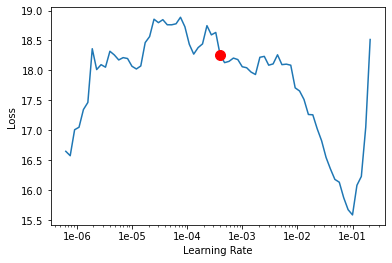

In [29]:
learn.recorder.plot(suggestion = True)

## Training

In [30]:
min_grad_lr = 5e-2

In [ ]:
learn.fit_one_cycle(10,min_grad_lr,callbacks=[SaveModelCallback(learn,name = "res50_clean_best_heat_1")])

epoch,train_loss,valid_loss,accuracy,time
0,2.736311,5.610568,0.034305,1:10:34
1,3.506159,224.272888,0.034305,1:08:36
2,3.462016,450001.625000,0.034305,1:07:37
3,3.672026,380.636108,0.034305,1:07:34
4,3.571846,18649.521484,0.034305,1:06:57


Better model found at epoch 0 with valid_loss value: 5.610567569732666.


In [ ]:
learn.save("res50_clean_heat_1_e10")

In [1]:
print("done")

done


In [2]:
learn.show_results()

NameError: name 'learn' is not defined

In [38]:
learn.callback_fns =[partial(CSVLogger, append=True)]

In [40]:
learn.callback_fns

[functools.partial(<class 'fastai.callbacks.csv_logger.CSVLogger'>, append=True)]

In [ ]:
learn.recorder.plot_losses()

## Testing

In [29]:
preds = learn.get_preds()

In [30]:
root_mean_squared_error(preds[0],preds[1])

tensor(2.3862)

In [31]:
mean_absolute_error(*preds)

tensor(1.1477)

In [32]:
exp_rmspe(*preds)

tensor(inf)

In [33]:
mean_squared_error(preds[0],preds[1])

tensor(5.6939)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
r2_score(*preds)

tensor(-0.6718)

### predictions

In [101]:
data

ImageDataBunch;

Train: LabelList (31726 items)
x: ImageList
Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520)
y: FloatList
1.0,1.0,1.0,1.0,1.0
Path: /home/kaiah_steven_maxkelsen_com/glaucoma/data/train_jamie;

Valid: LabelList (7931 items)
x: ImageList
Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520),Image (3, 400, 520)
y: FloatList
0.0,5.0,1.5,0.0,3.0
Path: /home/kaiah_steven_maxkelsen_com/glaucoma/data/train_jamie;

Test: None

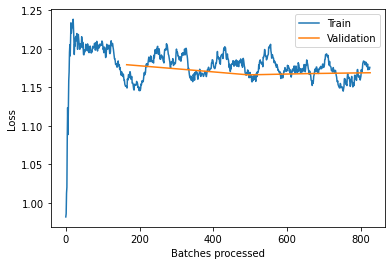

In [85]:
learn_jamie.recorder.plot_losses()

In [121]:
preds =learn_jamie.get_preds()

In [122]:
mean_squared_error(preds[0],preds[1])

tensor(1.1662)

In [123]:
root_mean_squared_error(preds[0],preds[1])

tensor(1.0799)

In [124]:
mean_absolute_error(*preds)

tensor(0.7763)

In [125]:
exp_rmspe(*preds)

tensor(7.4708)

In [111]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [126]:
r2_score(*preds)

tensor(0.6487)

## memory management

In [41]:
torch.cuda.empty_cache()

In [40]:
learn.destroy()

this Learner object self-destroyed - it still exists, but no longer usable


In [48]:
## Dropout Code dast ai

In [ ]:
class CustomDropout(nn.Module):
    """Custom Dropout module to be used as a baseline for MC Dropout"""

    def __init__(self, p:float, activate=True):
        super().__init__()
        self.activate = activate
        self.p = p

    def forward(self, x):
        return nn.functional.dropout(x, self.p, training=self.training or self.activate)

    def extra_repr(self):
        return f"p={self.p}, activate={self.activate}"


def switch_custom_dropout(m, activate:bool=True, verbose:bool=False):
    """Turn all Custom Dropouts training mode to true or false according to the variable activate"""
    for c in m.children():
        if isinstance(c, CustomDropout):
            print(f"Current active : {c.activate}")
            print(f"Switching to : {activate}")
            c.activate = activate
        else:
            switch_custom_dropout(c, activate=activate)

def convert_layers(model:nn.Module, original:nn.Module, replacement:nn.Module, get_args:Callable=None,
 additional_args:dict={}):
    """Convert modules of type "original" to "replacement" inside the model
    
    get_args : a function to use on the original module to eventually get its arguements to pass to the new module
    additional_args : a dictionary to add more args to the new module
    """
    for child_name, child in model.named_children():

        if isinstance(child, original):
            # First we grab args from the child
            if get_args:
                original_args = get_args(child)
            else:
                original_args = {}

            # If we want to provide additional args
            if additional_args:
                args = {**original_args, **additional_args}
            else:
                args = original_args

            new_layer = replacement(**args)
            setattr(model, child_name, new_layer)
        else:
            convert_layers(child, original, replacement,
                           get_args, additional_args)